In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
        np.array([
        1, 1, 1, 1,
        1, 0, 0, 0,
        1, 0, 0, 1,
        1, 1, 1, 1
        ]),
        np.array([
        1, 1, 1, 1,
        1, 0, 0, 1,
        1, 0, 0, 1,
        1, 0, 1, 1
        ]),
        np.array([
        1, 1, 1, 1,
        1, 0, 0, 1,
        1, 0, 0, 1,
        1, 1, 0, 1
        ]),

        np.array([
        1, 0, 0, 1,
        0, 1, 1, 0,
        0, 1, 1, 0,
        1, 0, 0, 1
        ]),
        np.array([
        1, 0, 0, 1,
        0, 1, 1, 0,
        0, 1, 0, 0,
        1, 0, 0, 1
        ]),
        np.array([
        0, 0, 0, 1,
        0, 1, 1, 0,
        0, 1, 1, 0,
        1, 0, 0, 1
        ])
    ])

print ("X= \n", X)

y = np.array([
    np.array([1, 0]),
    np.array([1, 0]),
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([0, 1]),
    np.array([0, 1])
    ])
print("y= \n", y)

X= 
 [[1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1]
 [1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1]
 [1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]
 [1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1]
 [0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]]
y= 
 [[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]


In [21]:
def runNeuralNet (X, y, _activation, _shuffle, _max_iter=10000, plots=True, r=0.001, alpha=0):
    lastLoss = 10
    while lastLoss > .1:
        mlp = MLPClassifier(
                                solver='sgd',
                                shuffle=_shuffle,
                                activation=_activation,
                                max_iter=_max_iter,
                                tol=1e-10,
                                hidden_layer_sizes=(1,),
                                momentum=alpha,
                                learning_rate_init=r,
                                verbose=False)
        mlp.fit(X, y)
        lastLoss = np.array(mlp.loss_curve_).min()
    
    print('Score: ', mlp.score(X, y))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', lastLoss)
    
    if plots:
        # Plot - curva de a perda
        losses = mlp.loss_curve_
        plt.plot(losses)
        plt.title("Loss (r = " + str(r) + ", alpha = " + str(alpha) + ")")
        plt.show()

    return mlp

Score:  1.0
Number of iterations:  374
Loss:  0.00013533284904569933


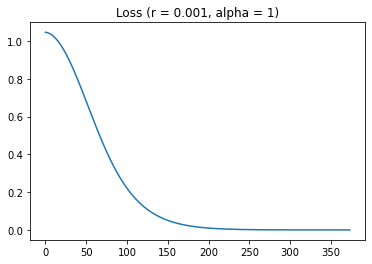

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00         3
   macro avg       0.00      0.00      0.00         3
weighted avg       0.00      0.00      0.00         3
 samples avg       0.00      0.00      0.00         3



C:\Users\arman\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arman\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
mlp = runNeuralNet(X=X[:3], y=y[:3], _activation='identity', _shuffle=True, _max_iter=1000000, plots=True, alpha=1)
ypred = mlp.predict(X[3::])
clr = classification_report(y[3::], ypred)
print("Classification Report:\n----------------------\n", clr)

Score:  1.0
Number of iterations:  387
Loss:  0.002741951212190757


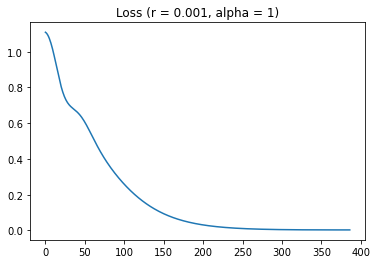

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6
 samples avg       1.00      1.00      1.00         6



In [19]:
mlp = runNeuralNet(X=X, y=y, _activation='tanh', _shuffle=True, _max_iter=1000000, plots=True, alpha=1)
ypred = mlp.predict(X)
clr = classification_report(y, ypred)
print("Classification Report:\n----------------------\n", clr)

Score:  1.0
Number of iterations:  380
Loss:  0.002892279739295124


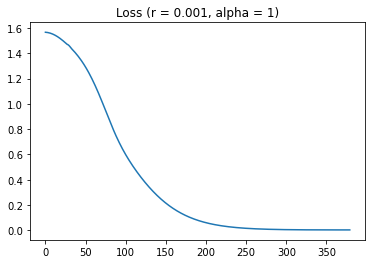

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2
 samples avg       1.00      1.00      1.00         2



In [10]:
mlp = runNeuralNet(X=X, y=y, _activation='relu', _shuffle=True, _max_iter=1000000, plots=True, alpha=1)
ypred = mlp.predict(X)
clr = classification_report(y, ypred)
print("Classification Report:\n----------------------\n", clr)

Score:  1.0
Number of iterations:  624
Loss:  0.016808841394726222


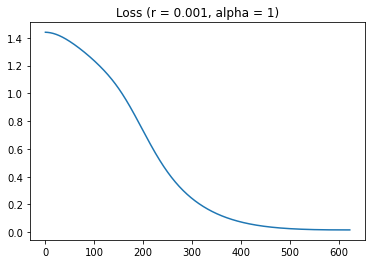

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2
 samples avg       1.00      1.00      1.00         2



In [14]:
mlp = runNeuralNet(X=X, y=y, _activation='logistic', _shuffle=True, _max_iter=1000000, plots=True, alpha=1)
ypred = mlp.predict(X)
clr = classification_report(y, ypred)
print("Classification Report:\n----------------------\n", clr)